In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\EOY Datasets\Full Datasets"+'\\'+'Full_outcome.csv')

In [5]:
df = df.drop(columns=['Unnamed: 0'],axis=1)
df.head()

Crime ID    Month  \
0  e9a50727f2189e0c50f704e3661bc1a8ae3a39aece4866...  2019-01   
1  fb06f54e9d633a961109ef74171e4beb40b2fe44e57a10...  2019-01   
2  4655ba031d5c8d00b247577a22472fbb8f9130d98b7d95...  2019-01   
3  2830f28a4a93138717182d1cc51b6d77cfaf3c27398934...  2019-01   
4  ca01d599d45f6e1d1bc5b05ddc6a1b559870fc831baa8e...  2019-01   

                      Reported by                    Crime type  \
0  Avon and Somerset Constabulary  Violence and sexual offences   
1  Avon and Somerset Constabulary  Violence and sexual offences   
2  Avon and Somerset Constabulary  Violence and sexual offences   
3  Avon and Somerset Constabulary                Theft offences   
4  Avon and Somerset Constabulary                Theft offences   

                                    Outcome type      Region Level_of_Lockdown  
0  Investigation complete. No suspect identified  South West       No Lockdown  
1                    Unable to prosecute suspect  South West       No Lockdown  
2  Investigation complete. No suspect identified  South West       No Lockdown  
3  Investigation complete. No suspect identified  South West       No Lockdown  
4  Investigation complete. No suspect identified  South West       No Lockdown

In [7]:
df['Year'] = df.Month.apply(lambda x: '2019' if x in ['2019-01','2019-02','2019-03'] else ('2020' if x in 
                                ['2020-01','2020-02','2020-03'] else ('2021' if x in ['2021-01','2021-02','2021-03'] else 'butts')))

In [8]:
df.Year.value_counts()

2019    692465
2020    652738
2021    566324
Name: Year, dtype: int64

In [11]:
df = df[['Crime ID', 'Year', 'Month', 'Region', 'Reported by', 'Crime type', 'Outcome type', 'Level_of_Lockdown']]
df.head()

Crime ID  Year    Month  \
0  e9a50727f2189e0c50f704e3661bc1a8ae3a39aece4866...  2019  2019-01   
1  fb06f54e9d633a961109ef74171e4beb40b2fe44e57a10...  2019  2019-01   
2  4655ba031d5c8d00b247577a22472fbb8f9130d98b7d95...  2019  2019-01   
3  2830f28a4a93138717182d1cc51b6d77cfaf3c27398934...  2019  2019-01   
4  ca01d599d45f6e1d1bc5b05ddc6a1b559870fc831baa8e...  2019  2019-01   

       Region                     Reported by                    Crime type  \
0  South West  Avon and Somerset Constabulary  Violence and sexual offences   
1  South West  Avon and Somerset Constabulary  Violence and sexual offences   
2  South West  Avon and Somerset Constabulary  Violence and sexual offences   
3  South West  Avon and Somerset Constabulary                Theft offences   
4  South West  Avon and Somerset Constabulary                Theft offences   

                                    Outcome type Level_of_Lockdown  
0  Investigation complete. No suspect identified       No Lockdown  
1                    Unable to prosecute suspect       No Lockdown  
2  Investigation complete. No suspect identified       No Lockdown  
3  Investigation complete. No suspect identified       No Lockdown  
4  Investigation complete. No suspect identified       No Lockdown

In [14]:
#df.to_csv('Full_dataset.csv')

In [35]:
df['Outcome type'].value_counts()

Investigation complete. No suspect identified    917049
Unable to prosecute suspect                      697036
Other Outcome                                    162503
Suspect charged                                  134939
Name: Outcome type, dtype: int64

In [36]:
grouped = df.groupby(['Year','Outcome type'])['Crime ID'].count()

In [37]:
grouped = grouped.reset_index()

In [38]:
grouped

Year                                   Outcome type  Crime ID
0   2019  Investigation complete. No suspect identified    349243
1   2019                                  Other Outcome     59123
2   2019                                Suspect charged     53798
3   2019                    Unable to prosecute suspect    230301
4   2020  Investigation complete. No suspect identified    309887
5   2020                                  Other Outcome     53455
6   2020                                Suspect charged     47245
7   2020                    Unable to prosecute suspect    242151
8   2021  Investigation complete. No suspect identified    257919
9   2021                                  Other Outcome     49925
10  2021                                Suspect charged     33896
11  2021                    Unable to prosecute suspect    224584

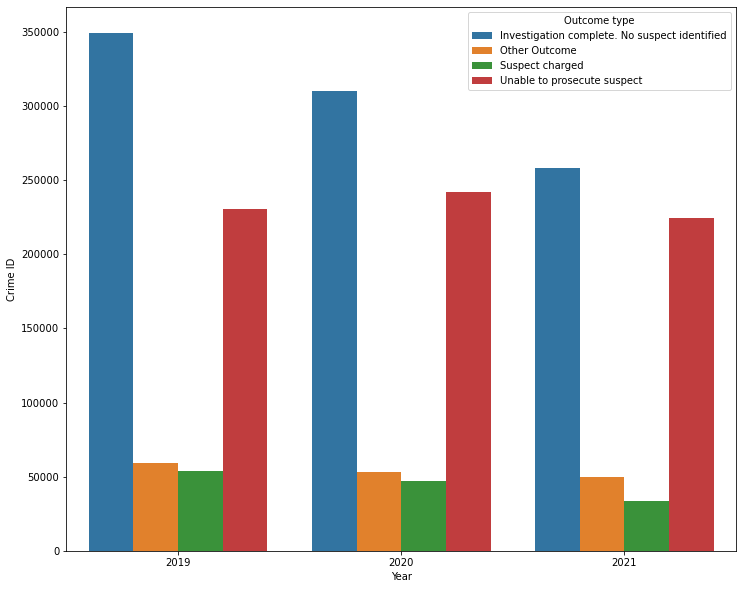

In [40]:
plt.figure(figsize=(12,10))
sns.barplot(data=grouped,x='Year',y='Crime ID',hue='Outcome type')
plt.show()

In [44]:
grouped2 = df.groupby(['Crime type','Outcome type'])['Crime ID'].count().reset_index()
#grouped2

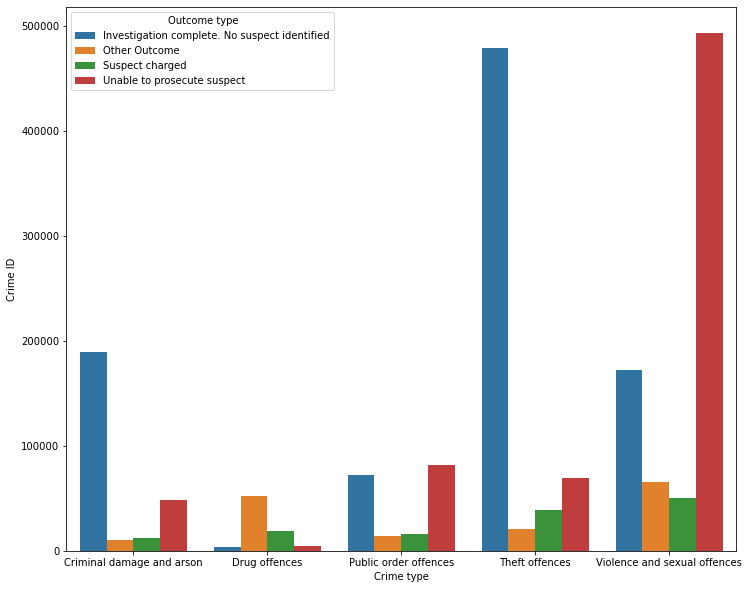

In [45]:
plt.figure(figsize=(12,10))
sns.barplot(data=grouped2,x='Crime type',y='Crime ID',hue='Outcome type')
plt.show()

In [46]:
grouped3 = df.groupby(['Year','Crime type'])['Crime ID'].count().reset_index()

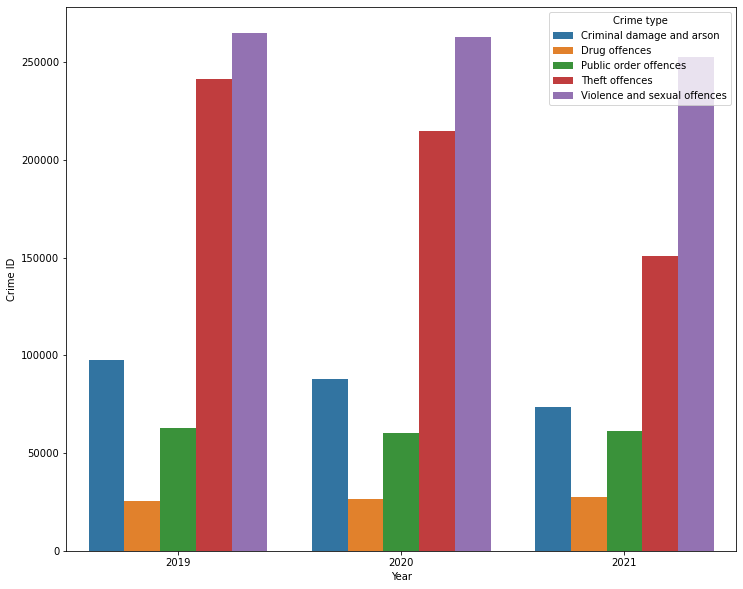

In [54]:
plt.figure(figsize=(12,10))
sns.barplot(data=grouped3,x='Year',y='Crime ID',hue='Crime type')
plt.show()